## Основы Matplotlib

### Задание: тип визуализации данных
Загрузите данные по ЕГЭ за последние годы \
https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv \
выберите данные за 2018-2019 учебный год. \
Выберите **тип диаграммы для отображения результатов по административному округу Москвы**, постройте выбранную диаграмму для количества школьников, написавших ЕГЭ на 220 баллов и выше. \
Выберите **тип диаграммы и постройте ее для районов Северо-Западного административного округа Москвы** для количества школьников, написавших ЕГЭ на 220 баллов и выше.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv",sep=";")
df = df.dropna(axis=1)
df["AdmArea"]=df["AdmArea"].apply(lambda x: x.split(" ")[0])
df = df.query("YEAR == '2018-2019'")
# print(df.head())
adm = df.groupby(by='AdmArea').sum()['PASSES_OVER_220']
# adm

AdmArea
Восточный           2150
Западный            2944
Зеленоградский       516
Новомосковский       242
Северный            1973
Северо-Восточный    1982
Северо-Западный     1716
Троицкий             209
Центральный         4067
Юго-Восточный       2011
Юго-Западный        2928
Южный               2630
Name: PASSES_OVER_220, dtype: int64

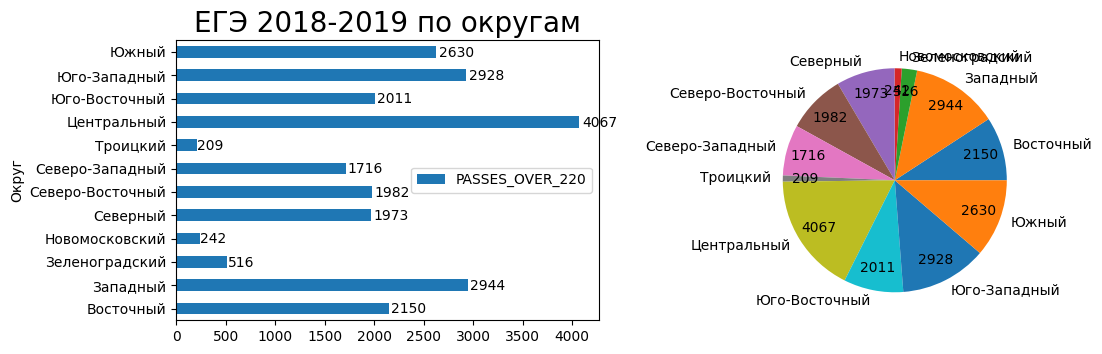

Наглядные типы диаграмм:
barh
pie


In [9]:
fig = plt.figure(figsize=(12,8))
area = fig.add_subplot(2,2,1)
adm.plot(kind="barh", ax=area) #, color='blue'
area.set_title("ЕГЭ 2018-2019 по округам", fontsize=20)
area.set_ylabel('Округ')
area.legend()

# Значение для показа на диаграммах (аннотации)
j = 0
for i in adm:
    area.annotate(round(i), xy=(i*1.01,j-.2))
    j += 1
    

# fig = plt.figure(figsize=(12,8))
area2 = fig.add_subplot(2,2,2)
total = sum(adm)
adm.plot(kind="pie", label="", ax=area2 , pctdistance=.8, autopct=lambda x:int(round(total * x/100))) 
plt.show()
print("Наглядные типы диаграмм:","barh","pie", sep="\n")

In [5]:
dist = df.loc[df['AdmArea']=='Северо-Западный'].groupby(by='District').sum()['PASSES_OVER_220']
# dist.shape
dist

District
район Куркино                 175
район Митино                  463
район Покровское-Стрешнево     55
район Северное Тушино         210
район Строгино                188
район Хорошёво-Мнёвники       293
район Щукино                  206
район Южное Тушино            126
Name: PASSES_OVER_220, dtype: int64

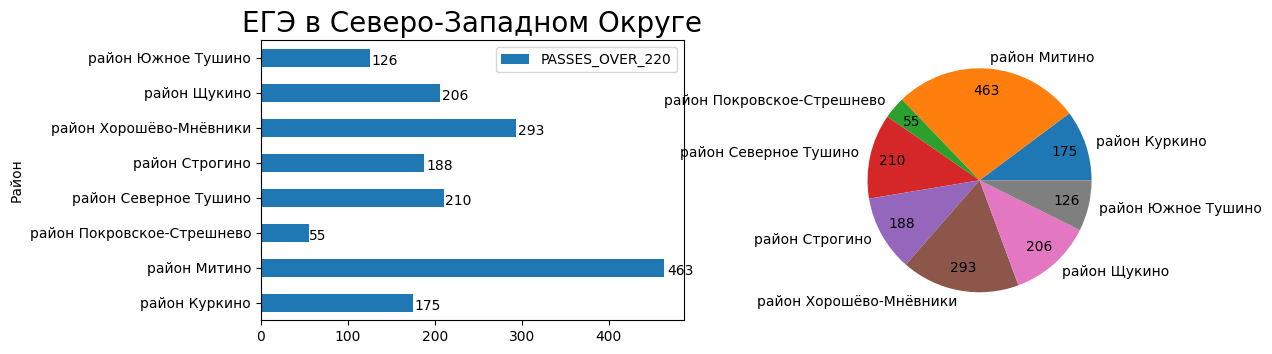

In [6]:
fig = plt.figure(figsize=(12,8))
area = fig.add_subplot(2,2,1)
dist.plot(kind="barh", ax=area) #, color='blue'
area.set_title("ЕГЭ в Северо-Западном Округе", fontsize=20)
area.set_ylabel('Район')
area.legend()

# Значение для показа на диаграммах (аннотации)
j = 0
for i in dist:
    area.annotate(round(i), xy=(i*1.01,j-.2))
    j += 1
    
area2 = fig.add_subplot(2,2,2)
total = sum(dist)
dist.plot(kind="pie", label="", ax=area2 , pctdistance=.8, autopct=lambda x:int(round(total * x/100))) 
plt.show()